# Анализ датасета

Импорт библиотек

In [22]:

import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from imblearn.over_sampling import SMOTE

sys.path.append('../../')

from core.datasets import open_f

Скачаем трейновый датасет

In [23]:
train_ds = open_f('repaired_data_train', back=2)

#### Посмотрим на гистограмме балансировку классов.

array([3341., 9650., 7595., 5625., 4941., 4604., 3859., 3876., 3332.,
       3177.])

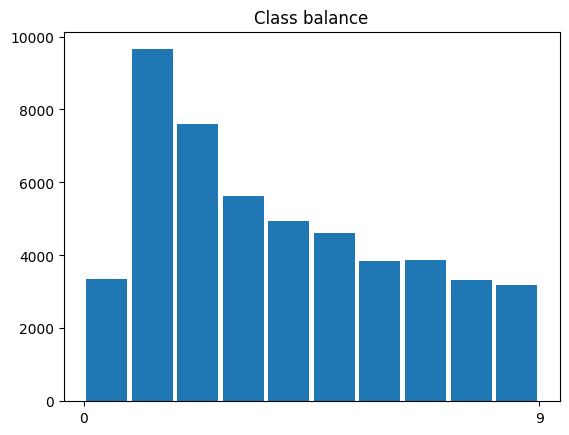

In [24]:
class_cnt = plt.hist(train_ds['labels'], rwidth=0.9)[0]
plt.xticks((0, 9))
plt.title('Class balance')
class_cnt

Как можно заметить, кол-во единиц в датасете сильно больше остальных классов.

Во время обучения это нельзя заметить, потому что примерно в таком же отношении датасет делится на трейновый и валидационный.

----
### Методы борьбы с несбалансировкой классов.
1. OverSampling
2. UnderSampling

### 9650 изображений каждого класса

In [25]:
sm = SMOTE(random_state=42)

In [26]:
X_train, y_train = train_ds['images'], train_ds['labels']

array([9650., 9650., 9650., 9650., 9650., 9650., 9650., 9650., 9650.,
       9650.])

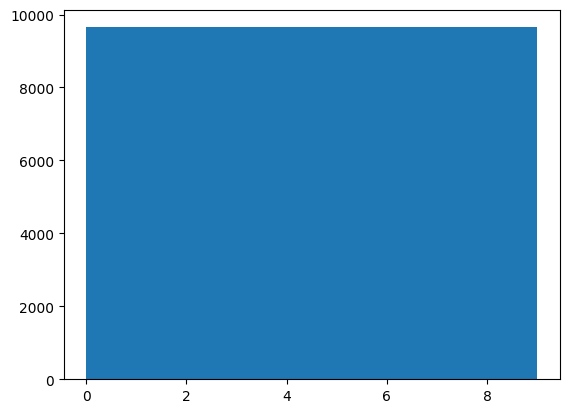

In [41]:
X_train_copy = X_train.reshape(len(X_train), -1)
y_train_copy = y_train
X_train_sm, y_train_sm = sm.fit_resample(X_train_copy, y_train_copy)
X_train_sm = X_train_sm.reshape(-1, 32, 32, 3)
train_ds['images'], train_ds['labels'] = X_train_sm, y_train_sm
X_train_sm.shape, y_train_sm.shape
# plt.hist(train_ds['labels'])[0]

In [28]:
pickle.dump(train_ds, open('../../data/smote_data_train_9650', 'wb'), protocol=pickle.HIGHEST_PROTOCOL)

Разделяем датасет на разные классы

In [29]:
X_train_0, y_train_0 = X_train[y_train == 0], y_train[y_train == 0]
X_train_1, y_train_1 = X_train[y_train == 1], y_train[y_train == 1]
X_train_2, y_train_2 = X_train[y_train == 2], y_train[y_train == 2]
X_train_3, y_train_3 = X_train[y_train == 3], y_train[y_train == 3]
X_train_4, y_train_4 = X_train[y_train == 4], y_train[y_train == 4]
X_train_5, y_train_5 = X_train[y_train == 5], y_train[y_train == 5]
X_train_6, y_train_6 = X_train[y_train == 6], y_train[y_train == 6]
X_train_7, y_train_7 = X_train[y_train == 7], y_train[y_train == 7]
X_train_8, y_train_8 = X_train[y_train == 8], y_train[y_train == 8]
X_train_9, y_train_9 = X_train[y_train == 9], y_train[y_train == 9]

In [30]:
def get_under_sampled(x_train_cur, y_train_cur, count):
    ind_cur = np.random.choice(np.arange(x_train_cur.shape[0]), size=count, replace=False)

    return x_train_cur[ind_cur], y_train_cur[ind_cur]

### 7000 изображений каждого класса

Классы, которые надо уменьшить

array([7000., 7000., 7000., 7000., 7000., 7000., 7000., 7000., 7000.,
       7000.])

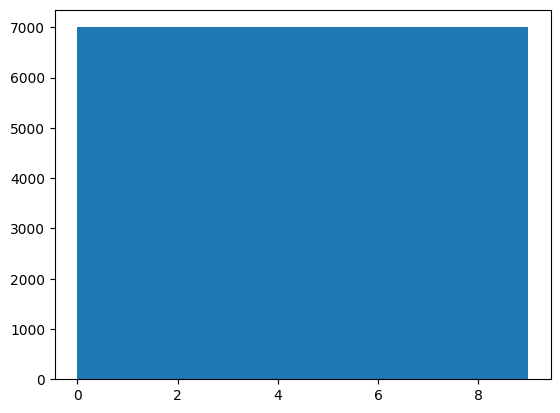

In [40]:
n = 7000
X_train_1_7000, y_train_1_7000 = get_under_sampled(X_train_1, y_train_1, n)
X_train_2_7000, y_train_2_7000 = get_under_sampled(X_train_2, y_train_2, n)

X_train_copy = np.concatenate((X_train_0, X_train_1_7000, X_train_2_7000, X_train_3, X_train_4, X_train_5, X_train_6, X_train_7, X_train_8, X_train_9), axis=0)
y_train_copy = np.concatenate((y_train_0, y_train_1_7000, y_train_2_7000, y_train_3, y_train_4, y_train_5, y_train_6, y_train_7, y_train_8, y_train_9), axis=0)
X_train_copy = X_train_copy.reshape(len(X_train_copy), -1)
X_train_7000_sm, y_train_7000_sm = sm.fit_resample(X_train_copy, y_train_copy)
X_train_7000_sm = X_train_7000_sm.reshape(-1, 32, 32, 3)
train_ds['images'], train_ds['labels'] = X_train_7000_sm, y_train_7000_sm
X_train_7000_sm.shape, y_train_7000_sm.shape
# plt.hist(train_ds['labels'])[0]

In [32]:
pickle.dump(train_ds, open('../../data/smote_data_train_7000', 'wb'), protocol=pickle.HIGHEST_PROTOCOL)

### 5000 изображений каждого класса

In [43]:
n = 5000
X_train_1_5000, y_train_1_5000 = get_under_sampled(X_train_1, y_train_1, n)
X_train_2_5000, y_train_2_5000 = get_under_sampled(X_train_2, y_train_2, n)
X_train_3_5000, y_train_3_5000 = get_under_sampled(X_train_3, y_train_3, n)

X_train_copy = np.concatenate((X_train_0, X_train_1_5000, X_train_2_5000, X_train_3_5000, X_train_4, X_train_5, X_train_6, X_train_7, X_train_8, X_train_9), axis=0)
y_train_copy = np.concatenate((y_train_0, y_train_1_5000, y_train_2_5000, y_train_3_5000, y_train_4, y_train_5, y_train_6, y_train_7, y_train_8, y_train_9), axis=0)
X_train_copy = X_train_copy.reshape(len(X_train_copy), -1)
X_train_5000_sm, y_train_5000_sm = sm.fit_resample(X_train_copy, y_train_copy)
X_train_5000_sm = X_train_5000_sm.reshape(-1, 32, 32, 3)
train_ds['images'], train_ds['labels'] = X_train_5000_sm, y_train_5000_sm
X_train_5000_sm.shape, y_train_5000_sm.shape
# plt.hist(train_ds['labels'])[0]

((50000, 32, 32, 3), (50000,))

In [34]:
pickle.dump(train_ds, open('../../data/smote_data_train_5000', 'wb'), protocol=pickle.HIGHEST_PROTOCOL)

In [39]:
# print(np.all(np.asarray([X_train_sm[i] not in X_train for i in range(50000, 96500 - 1)])))  # проверка на совпадение

# for index in range(50000, 50020):
#     min_val = 1e9
#     min_i = -1
#     for i in range(50000):
#         if np.sum(np.abs(X_train[i] - X_train_sm[index])) < min_val:
#             min_val = np.sum(np.abs(X_train[i] - X_train_sm[index]))
#             min_i = i
#     display(Image.fromarray(np.uint8(X_train_sm[index])).resize((100, 100)))
#     display(Image.fromarray(np.uint8(X_train[min_i])).resize((100, 100)))